# Customer Clustering with PCA, KMeans and Agglomerative for a Marketing Campaign

## Introduction



This notebook provides an overview of the steps taken to process and explore the data in the marketing campaign data. The code uses Pandas and Plotly Express for data preprocessing, visualization, and exploration. The code also uses scikit-learn for dimensionality reduction using PCA and for clustering using KMeans and Agglomerative Clustering.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

In [4]:
# Get the shape of the dataframe
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (2240, 29)


In [5]:
# Get the head of the dataframe
print("\nFirst 5 rows of the dataframe:")
df.head()


First 5 rows of the dataframe:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Get the tail of the dataframe
print("\nLast 5 rows of the dataframe:")
df.tail()


Last 5 rows of the dataframe:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [7]:
# Get the information about the dataframe
print("\nInformation about the dataframe:")
print(df.info())


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumD

In [8]:
# Get the summary statistics of the dataframe
print("\nSummary statistics of the dataframe:")
df.describe()


Summary statistics of the dataframe:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
# Get the data type of each column in the dataframe
print("\nData type of each column in the dataframe:")
print(df.dtypes)


Data type of each column in the dataframe:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


# Data Preparation 

### Missing Data 

In [10]:
# Check for missing data
print("Missing data in the dataframe:")
print(df.isnull().sum())


Missing data in the dataframe:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


<Axes: >

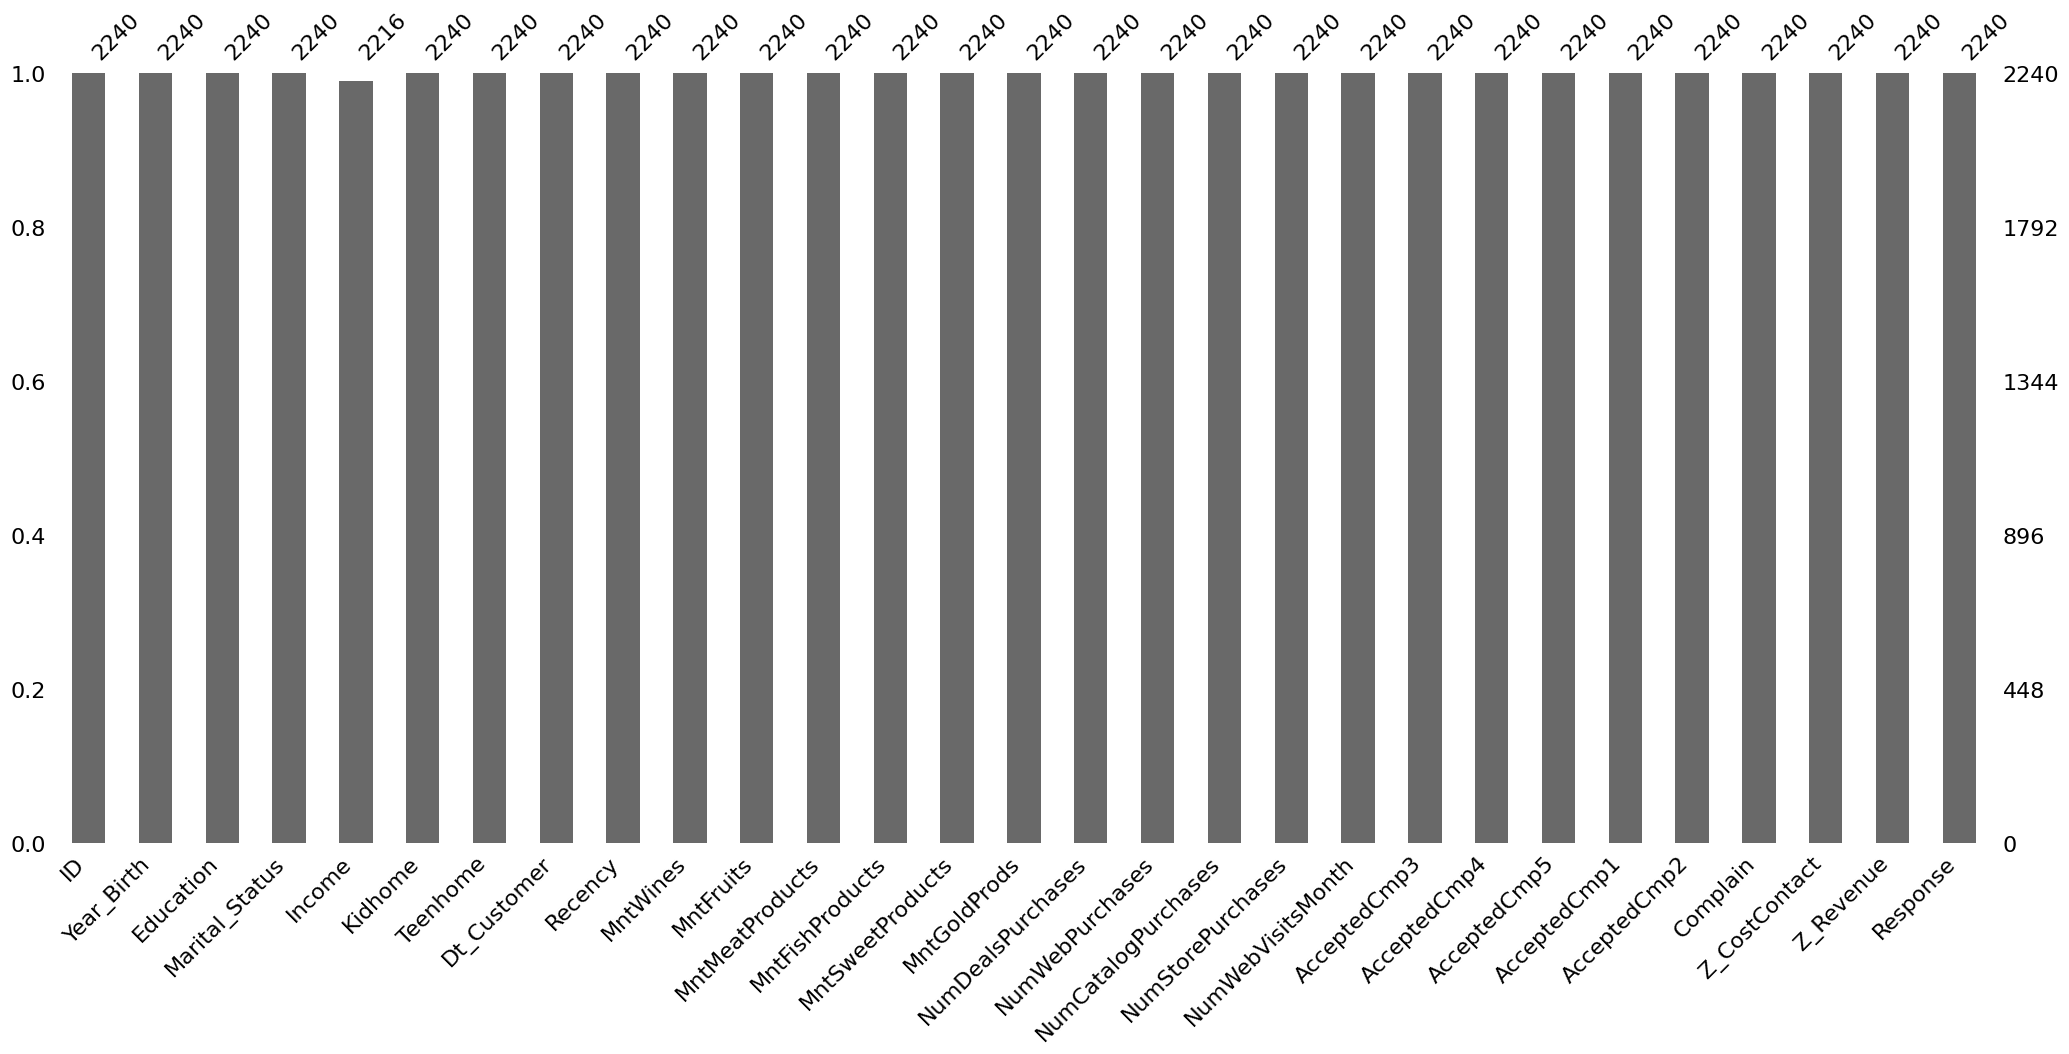

In [11]:
import missingno as msno
# Visualize missing data

msno.bar(df)

<Axes: >

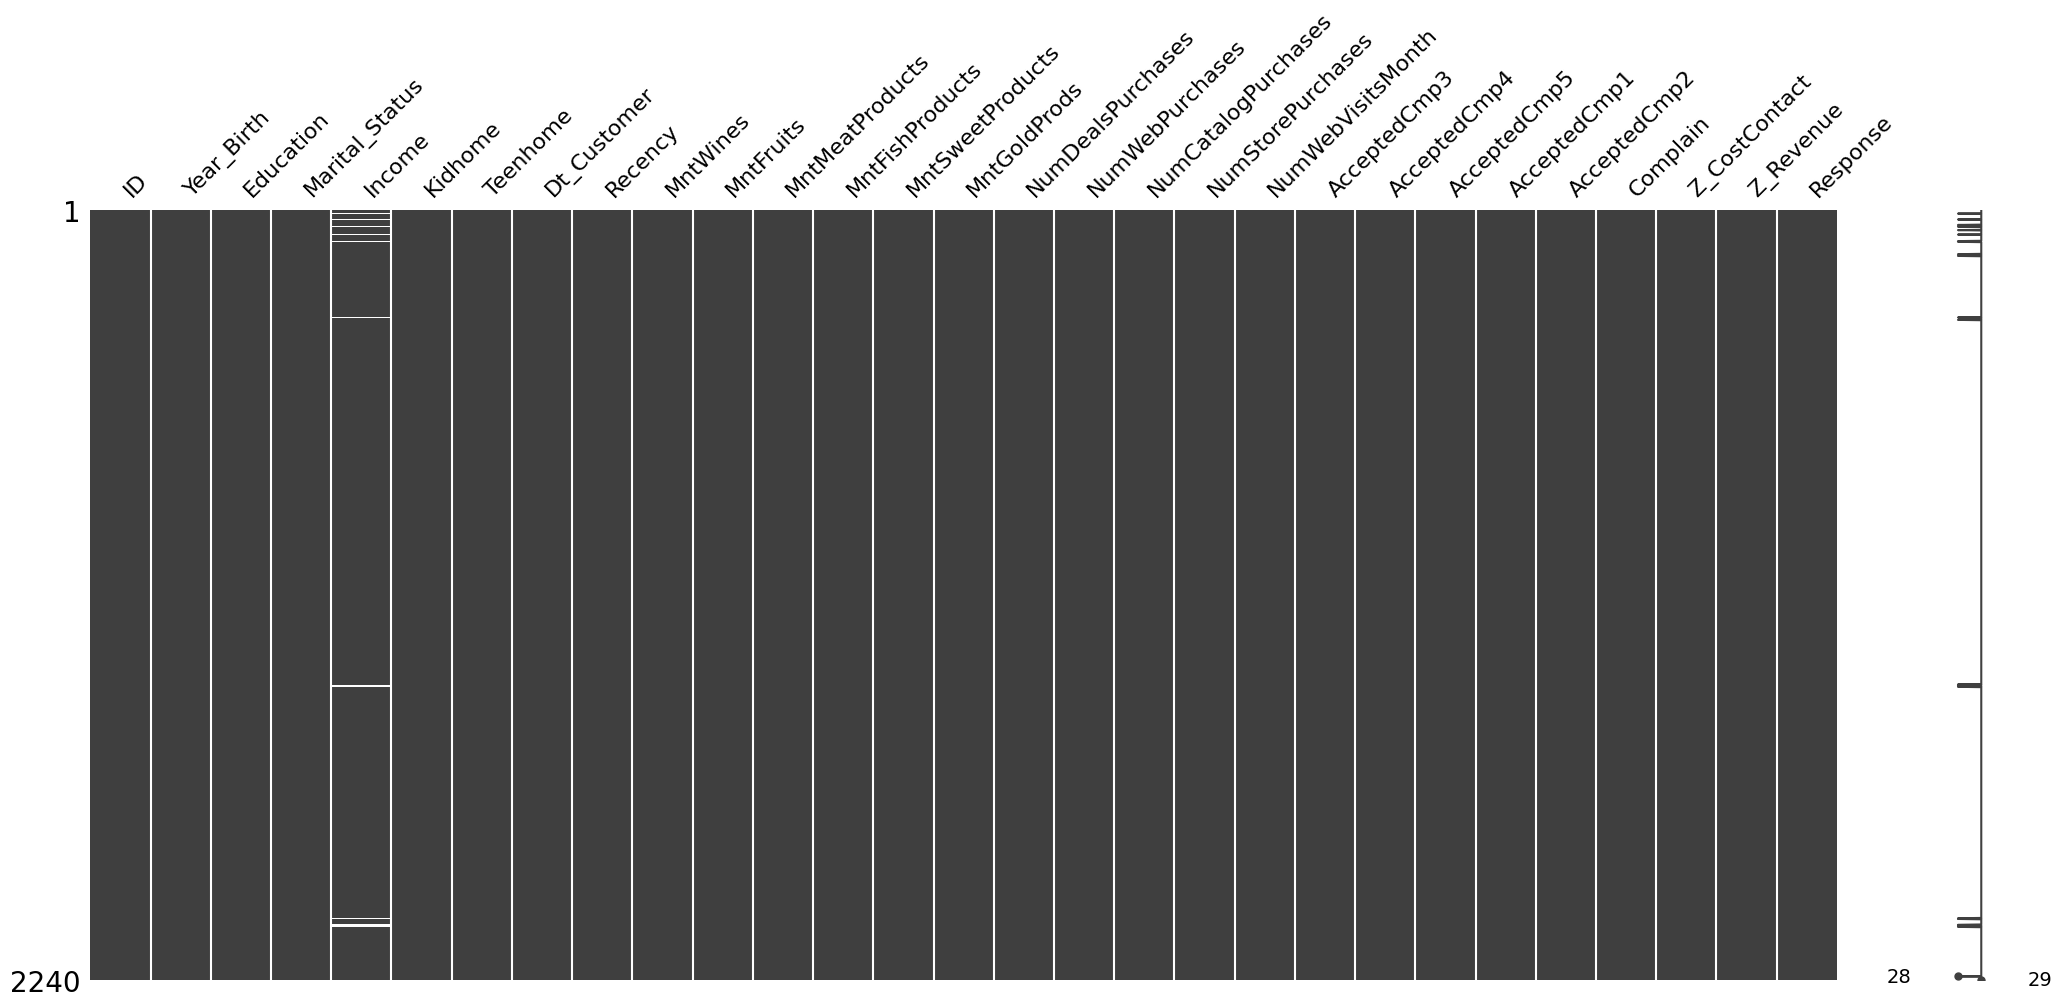

In [12]:
# Visualize missing data
msno.matrix(df)


"Given that missing data exists only in one column and constitutes only a small proportion (24 out of 2240) of the total data, we have decided to drop these missing values without significantly affecting the overall integrity of the data."

In [13]:
df = df.dropna()

In [14]:
# Check for missing data
print("Missing data in the dataframe:")
print(df.isnull().sum())

Missing data in the dataframe:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [15]:
df.duplicated().sum()

0

### Outliers 

In [16]:
import matplotlib.pyplot as plt

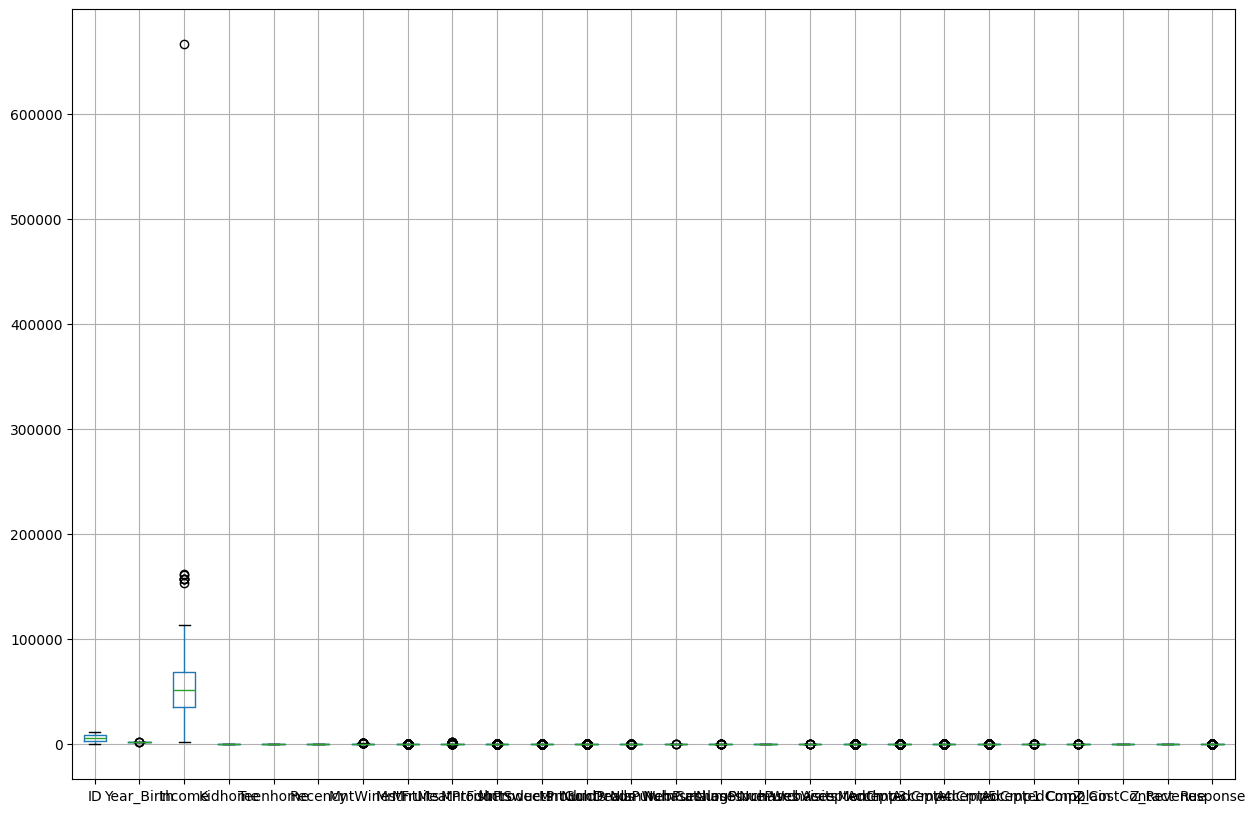

In [17]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the box plots for all columns
df.boxplot(ax=ax)

# Show the plot
plt.show()






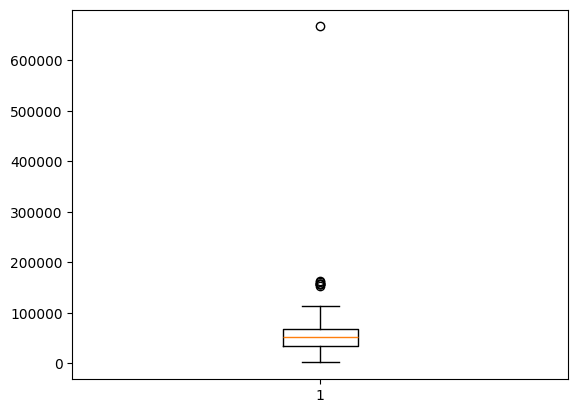

In [18]:
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

In [19]:

# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 8


In [20]:
# Remove the outliers in the Income column
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [21]:
# Print the updated shape of the dataframe
print("Updated shape of the dataframe:", df.shape)

Updated shape of the dataframe: (2208, 29)


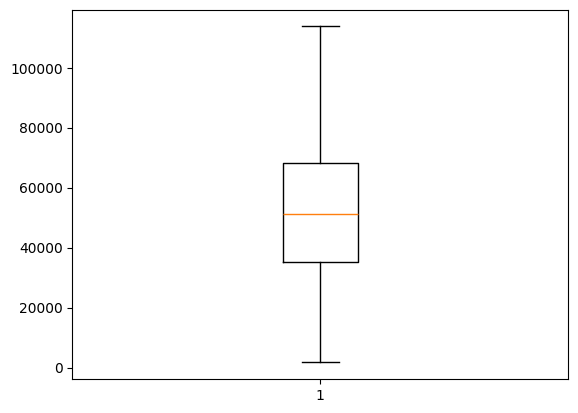

In [22]:
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

# Feature engineering

### Creating new features/columns

In [23]:
print("Unique values in Education column:", df['Education'].unique())
print("Unique values in Marital_Status column:", df['Marital_Status'].unique())


Unique values in Education column: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Marital_Status column: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [24]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 'High'
    elif education in ['Basic']:
        return 'Middle'
    else:
        return 'Low'

df['Education_Level'] = df['Education'].apply(education_level)


In [25]:
def living_status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 'Living Alone'
    else:
        return 'Living with Others'

df['Living_Status'] = df['Marital_Status'].apply(living_status)


#### Creating Age

In [26]:
df['Age'] = 2022 - df['Year_Birth']


#### Creating Total number of campaigns accepted

In [27]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


#### Creating Average spend per purchase:


In [28]:
df['Average_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases']


In [29]:
df['Average_Spend'].describe()

count    2208.000000
mean             inf
std              NaN
min         0.533333
25%        39.125000
50%       130.000000
75%       605.000000
max              inf
Name: Average_Spend, dtype: float64

In [30]:
df['Average_Spend'].replace([np.inf, -np.inf], 0, inplace=True)

In [31]:
df['Average_Spend'].describe()

count    2208.000000
mean      404.768318
std       558.593592
min         0.000000
25%        36.000000
50%       115.083333
75%       526.875000
max      2525.000000
Name: Average_Spend, dtype: float64

#### Creating Spent

In [32]:
df['Spent'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] +df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']


#### Creating  "Is_Parent" to indicate parenthood status:

In [33]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)


#### Creating total spending in the last 2 years || average monthly visits to the company's website ||  ratio of online purchases to total purchases

In [34]:
# create new feature for total spending in the last 2 years
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# create new feature for average monthly visits to the company's website
df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12

# create new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])


In [35]:
#since we have created lot of new features, we will try to see if there any null values present in our data
df.isnull().sum()

ID                          0
Year_Birth                  0
Education                   0
Marital_Status              0
Income                      0
Kidhome                     0
Teenhome                    0
Dt_Customer                 0
Recency                     0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
Education_Level             0
Living_Status               0
Age                         0
Total_Campaigns_Accepted    0
Average_Sp

In [36]:
nan_rows = df[df['online_purchase_ratio'].isnull()]
print(nan_rows[['online_purchase_ratio', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']])

df['online_purchase_ratio'].fillna(0, inplace=True)

      online_purchase_ratio  NumWebPurchases  NumCatalogPurchases  \
981                     NaN                0                    0   
1245                    NaN                0                    0   
1524                    NaN                0                    0   
1846                    NaN                0                    0   

      NumStorePurchases  
981                   0  
1245                  0  
1524                  0  
1846                  0  


In [37]:
df['online_purchase_ratio'].isnull().sum()

0

#### Dropping non relevant Columns/Features

In [38]:
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis=1)

In [39]:
df.dtypes

Education                    object
Marital_Status               object
Income                      float64
Kidhome                       int64
Teenhome                      int64
Recency                       int64
MntWines                      int64
MntFruits                     int64
MntMeatProducts               int64
MntFishProducts               int64
MntSweetProducts              int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
AcceptedCmp3                  int64
AcceptedCmp4                  int64
AcceptedCmp5                  int64
AcceptedCmp1                  int64
AcceptedCmp2                  int64
Complain                      int64
Response                      int64
Education_Level              object
Living_Status                object
Age                           int64
Total_Campaigns_Accepted    

# Exploratory data analysis

### Distribution of Income


In [40]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

This histogram shows the distribution of the Income column, which represents the income of each customer. The x-axis shows the range of incomes, and the y-axis shows the number of customers who fall into each range. The histogram helps us understand the spread of income among the customers, and whether there are any outliers or anomalies in the data.

In [41]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [42]:
import plotly.express as px


fig0 = px.histogram(df, x="Income", nbins=50)
fig0.show()


### Distribution of Age

This code will plot a histogram showing the distribution of the 'Age' column in the data. The x-axis will represent the age and the y-axis will represent the count of customers with that ag

In [43]:

fig1 = px.histogram(df, x="Age", nbins=30, color='Age', title="Distribution of Age")
fig1.show()


### Marital Status Distribution

The  plot shows the distribution of customers based on their marital status, which can be useful in understanding the different family structures

In [44]:
# Marital Status Distribution
fig2 = px.histogram(df, x='Marital_Status', nbins=5, title="Marital Status Distribution")
fig2.show()


### Education Level Distribution

The  plot shows the distribution of customers based on their education level, which can be useful in understanding the level of education and potentially the level of income of the customers

In [45]:

# Education Level Distribution
fig3 = px.histogram(df, x='Education_Level', nbins=5, title="Education Level Distribution")
fig3.show()

### Average Spend by Marital Status

In [46]:
import plotly.express as px

df_plot = df.groupby(['Marital_Status'])['Average_Spend'].mean().reset_index()

fig4 = px.bar(df_plot, x='Marital_Status', y='Average_Spend', color='Marital_Status')

fig4.show()


### Average Spend by Education Leve

In [47]:

df_plot = df.groupby(['Education_Level'])['Average_Spend'].mean().reset_index()

fig5 = px.bar(df_plot, x='Education_Level', y='Average_Spend', color='Education_Level')

fig5.show()


These plots aim to visualize the relationship between marital status/education level and average spend, which can help to identify segments of customers with similar spending patterns.

### the distribution of number of children in household

This plot shows the distribution of the number of children in households. It helps to see the number of households with 0 children, 1 child, 2 children, etc.

In [48]:
# Plot the distribution of number of children in household
fig6 = px.histogram(df, x='Kidhome')
fig6.show()

### the distribution of number of teenagers in household

this plot shows the distribution of the number of teenagers in households. It helps to see the number of households with 0 teenagers, 1 teenager, 2 teenagers, etc.

In [49]:
# Plot the distribution of number of teenagers in household
fig7 = px.histogram(df, x='Teenhome')
fig7.show()

### "Total Campaigns Accepted Distribution"

"Total Campaigns Accepted Distribution", we are plotting a histogram of the Total_Campaigns_Accepted column. This plot will show us the distribution of the number of campaigns accepted by each customer.

In [50]:
# Total Campaigns Accepted Distribution
fig8 = px.histogram(df, x='Total_Campaigns_Accepted', nbins=20, title="Total Campaigns Accepted Distribution")
fig8.show()



 ### "Average Spend per Purchase Distribution"

 "Average Spend per Purchase Distribution", we are plotting a histogram of the Average_Spend column. This plot will show us the distribution of the average spend per purchase made by each customer.

In [51]:
# Average Spend per Purchase Distribution
fig9 = px.histogram(df, x='Average_Spend', nbins=20, title="Average Spend per Purchase Distribution")
fig9.show()

### Spending Distribution by Marital Status
### Spending Distribution by Education Level
### Spending Distribution by Is_Parent

These plots aim to show the distribution of spending across different categories of Marital Status, Education Level and Is_Parent. The histograms allow us to see the frequency of different spending levels in each category and to compare the spending distributions across categories.

In [52]:
fig10 = px.histogram(df, x='total_spending', color='Marital_Status', nbins=50,
                   title='Spending Distribution by Marital Status')
fig11 = px.histogram(df, x='total_spending', color='Education_Level', nbins=50,
                   title='Spending Distribution by Education Level')
fig12 = px.histogram(df, x='total_spending', color='Is_Parent', nbins=50,
                   title='Spending Distribution by Is_Parent')

fig10.show()
fig11.show()
fig12.show()

### the Distribution of Online Purchase Ratio

In [53]:
# Plot the Distribution of Online Purchase Ratio
fig13 = px.histogram(df, x='online_purchase_ratio')
fig13.show()


In [54]:

# Plot the Distribution of Number of Web Visits per Month
fig14 = px.histogram(df, x='NumWebVisitsMonth')
fig14.show()


### the Distribution of Number of Web Purchases

In [55]:

# Plot the Distribution of Number of Web Purchases
fig15 = px.histogram(df, x='NumWebPurchases')
fig15.show()


### Distribution of Number of Catalog Purchases

In [56]:

# Plot the Distribution of Number of Catalog Purchases
fig16 = px.histogram(df, x='NumCatalogPurchases')
fig16.show()



### Distribution of Number of Store Purchases

In [57]:
# Plot the Distribution of Number of Store Purchases
fig17 = px.histogram(df, x='NumStorePurchases')
fig17.show()

### "NumWebPurchases" vs "NumStorePurchases"

"NumWebPurchases" vs "NumStorePurchases" to see if there is a relationship between the two types of purchases. The box plot shows the median, first and third quartiles, and outliers of the data.

In [58]:
# box plot of NumWebPurchases vs NumStorePurchases
fig18 = px.box(df, x="NumWebPurchases", y="NumStorePurchases")
fig18.show()

###  scatter plot of "NumWebPurchases" vs "NumWebVisitsMonth"

scatter plot of "NumWebPurchases" vs "NumWebVisitsMonth" to see if there is a correlation between web purchases and visits. The scatter plot shows the relationship between two variables as individual data points. A positive correlation is indicated by the points moving from lower left to upper right, while a negative correlation is indicated by the points moving from upper left to lower right.

In [59]:
# scatter plot of NumWebPurchases vs NumWebVisitsMonth
fig19 = px.scatter(df, x="NumWebPurchases", y="NumWebVisitsMonth")
fig19.show()

###  Scatter plot of "MntFruits" vs "MntMeatProducts"

The  scatter plot shows the relationship between the amount spent on fruits and the amount spent on meat products.


In [60]:
# Scatter plot of "MntFruits" vs "MntMeatProducts"
fig20 = px.scatter(df, x="MntFruits", y="MntMeatProducts")
fig20.show()

###  Scatter plot of "MntWines" vs "MntSweetProducts"

The scatter plot shows the relationship between the amount spent on wines and the amount spent on sweet products.


In [61]:
# Scatter plot of "MntWines" vs "MntSweetProducts"
fig21 = px.scatter(df, x="MntWines", y="MntSweetProducts")
fig21.show()


### Scatter plot of "MntWines" vs "MntSweetProducts" with a "Income"

The scatter plot shows the relationship between the amount spent on wines and the amount spent on sweet products, with a third variable represented by size. The size of the marker represents the number of web visits per month, and the color of the marker represents the income level

In [62]:
# Scatter plot of "MntWines" vs "MntSweetProducts" with a third variable represented by size or color
fig22 = px.scatter(df, x="MntWines", y="MntSweetProducts", size="NumWebVisitsMonth", color="Income", size_max=50)
fig22.show()


###  Violin plot of "AcceptedCmp1" vs "AcceptedCmp2" 
###  Violin plot of "AcceptedCmp3" vs "AcceptedCmp4" 


A violin plot is a type of box plot that shows the probability density of the data at different values. The violin plot shows the distribution of the data, including the median, quartiles, and the distribution of the data. In this case, we are using the violin plot to see if there is a relationship between the two campaigns (AcceptedCmp1 vs AcceptedCmp2 and AcceptedCmp3 vs AcceptedCmp4). If there is a relationship between the two campaigns, then the violin plots will show similar shapes and distributions, indicating that the customers who accepted one campaign are likely to accept the other campaign as well.

In [63]:
# Create the violin plots
fig23 = px.violin(df, x="AcceptedCmp1", y="AcceptedCmp2", box=True, points="all")
fig23.update_layout(title="AcceptedCmp1 vs AcceptedCmp2", xaxis_title="AcceptedCmp1", yaxis_title="AcceptedCmp2")

fig24 = px.violin(df, x="AcceptedCmp3", y="AcceptedCmp4", box=True, points="all")
fig24.update_layout(title="AcceptedCmp3 vs AcceptedCmp4", xaxis_title="AcceptedCmp3", yaxis_title="AcceptedCmp4")

# Show the plots
fig23.show()
fig24.show()

###  Scatter plot of "NumDealsPurchases" vs "NumCatalogPurchases"

In [64]:
# Scatter plot of "NumDealsPurchases" vs "NumCatalogPurchases"
fig25 = px.scatter(df, x="NumDealsPurchases", y="NumCatalogPurchases", trendline="ols")
fig25.show()



###  Pairplot of "Income", "NumWebPurchases", and "NumStorePurchases"

In [65]:
# Pairplot of "Income", "NumWebPurchases", and "NumStorePurchases"
fig26 = px.scatter_matrix(df, dimensions=["Income", "NumWebPurchases", "NumStorePurchases"])
fig26.show()


In [66]:
import plotly.express as px
import plotly.io as pio

for i in range(27):
    fig = eval(f"fig{i}")
    pio.write_html(fig, file=f'fig{i}.html', auto_play=True)


In [67]:
df.dtypes

Education                    object
Marital_Status               object
Income                      float64
Kidhome                       int64
Teenhome                      int64
Recency                       int64
MntWines                      int64
MntFruits                     int64
MntMeatProducts               int64
MntFishProducts               int64
MntSweetProducts              int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
AcceptedCmp3                  int64
AcceptedCmp4                  int64
AcceptedCmp5                  int64
AcceptedCmp1                  int64
AcceptedCmp2                  int64
Complain                      int64
Response                      int64
Education_Level              object
Living_Status                object
Age                           int64
Total_Campaigns_Accepted    

# Clustering 

## One-hot encoding

In [68]:
# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=["Marital_Status", "Education","Education_Level","Living_Status"])

In [69]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Education_Level_High,Education_Level_Low,Education_Level_Middle,Living_Status_Living Alone,Living_Status_Living with Others
0,58138.0,0,0,58,635,88,546,172,88,88,...,False,False,True,False,False,True,False,False,False,True
1,46344.0,1,1,38,11,1,6,2,1,6,...,False,False,True,False,False,True,False,False,False,True
2,71613.0,0,0,26,426,49,127,111,21,42,...,False,False,True,False,False,True,False,False,False,True
3,26646.0,1,0,26,11,4,20,10,3,5,...,False,False,True,False,False,True,False,False,False,True
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,False,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,False,False,True,False,False,True,False,False,False,True
2236,64014.0,2,1,56,406,0,30,0,0,8,...,False,False,False,False,True,True,False,False,False,True
2237,56981.0,0,0,91,908,48,217,32,12,24,...,False,False,True,False,False,True,False,False,False,True
2238,69245.0,0,1,8,428,30,214,80,30,61,...,False,False,False,True,False,True,False,False,False,True


## Data Scaling StandardScaler

In [70]:
from sklearn.preprocessing import StandardScaler


# Select the numerical columns to scale
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 
            'total_spending', 'avg_web_visits', 'online_purchase_ratio', 'Age', 
            'Total_Campaigns_Accepted', 'Is_Parent']

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [71]:
df.max()

Income                               2.998759
Kidhome                              2.901566
Teenhome                              2.74468
Recency                                1.7277
MntWines                             3.517365
MntFruits                            4.332157
MntMeatProducts                      7.160829
MntFishProducts                      4.037185
MntSweetProducts                     5.713718
MntGoldProds                         5.341196
NumDealsPurchases                    6.728524
NumWebPurchases                      8.370194
NumCatalogPurchases                  9.062479
NumStorePurchases                    2.215493
NumWebVisitsMonth                     6.07708
AcceptedCmp3                         3.542035
AcceptedCmp4                         3.530356
AcceptedCmp5                         3.553819
AcceptedCmp1                         3.814354
AcceptedCmp2                         8.520563
Complain                            10.205041
Response                          

# PCA

In [72]:
from sklearn.decomposition import PCA

# Initialize the PCA model
pca = PCA(n_components=8)

# Fit and transform the data
df_pca = pca.fit_transform(df)


# Determining the optimal number of clusters using Silhouette Score

In [74]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

list_k = list(range(2, 10))
silhouette_scores = []
for k in list_k:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, preds))

best_k = list_k[np.argmax(silhouette_scores)]


In [75]:
best_k

2

In [76]:
silhouette_scores

[0.6492710951975145,
 0.6146283188054574,
 0.5660838703959749,
 0.5990991038634088,
 0.5704572535419883,
 0.5913355669515187,
 0.5767794461470861,
 0.5681982328675018]

# kmeans

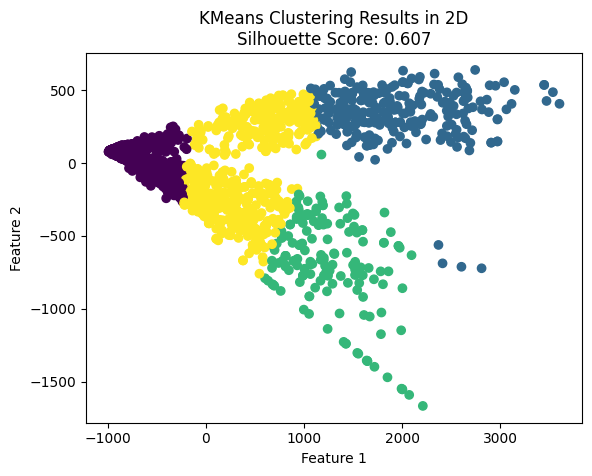

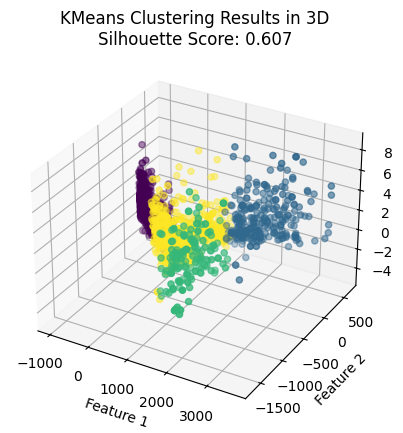

In [88]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# Fit the KMeans model with the number of clusters set to 3
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

# Get the predictions
predictions = kmeans.predict(df_pca)

# Calculate the silhouette score
silhouette_score_value = silhouette_score(df_pca, predictions)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(df_pca, predictions)

# Calculate the Davies-Bouldin Index
davies_bouldin_score_value = davies_bouldin_score(df_pca, predictions)

# Visualize the results in 2D
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results in 2D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

# Visualize the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=predictions, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering Results in 3D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

# Agglomerative Clustering

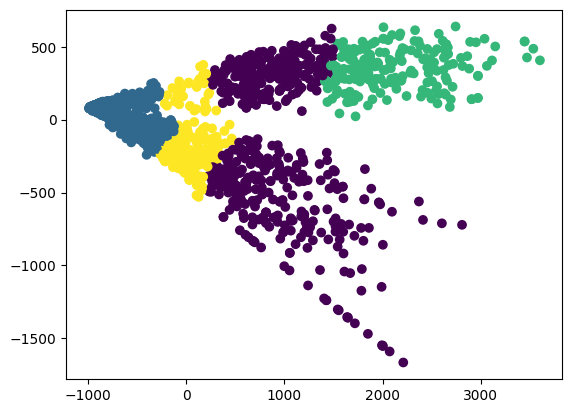

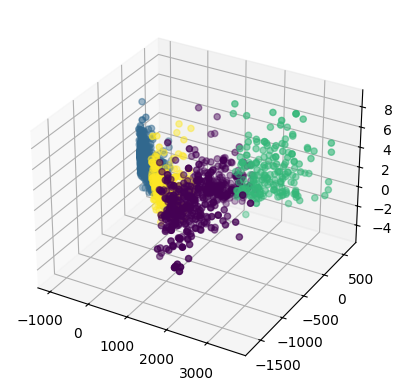

Davies-Bouldin Index: 0.7846576627468026
Silhouette Score: 0.49941911429946834
Calinski-Harabasz Index: 4462.8474602331935


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import davies_bouldin_score

# Generate sample data
X = df_pca

# Compute the pairwise distances between samples
dist_matrix = squareform(pdist(X))

# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_cluster.fit(X)

# Plot the data points colored by their cluster labels in 2D
plt.scatter(X[:, 0], X[:, 1], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Plot the data points colored by their cluster labels in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Calculate the Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X, agg_cluster.labels_)
print("Davies-Bouldin Index:", davies_bouldin_index)
# Calculate the silhouette score
silhouette_score_value = silhouette_score(X, agg_cluster.labels_)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(X, agg_cluster.labels_)

print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Index:", calinski_harabasz_score_value)

## Summary:


The code starts by loading a tab-separated file into a Pandas dataframe. It then performs various operations to understand the structure and content of the data, including getting the number of rows and columns, checking for missing data, and getting summary statistics. The code then performs data preprocessing, including one-hot encoding of categorical variables and scaling of numerical variables. The data is then reduced to 8 components using PCA, and two clustering algorithms (KMeans and Agglomerative Clustering) are applied to the data. 

Finally, various evaluation metrics are used to assess the quality of the clustering results. The code visualizes the results of the clustering, as well as the relationships between different variables in the data, through various types of plots, including histograms, box plots, scatter plots, violin plots, and pair plots.